# CE - 652
## Artificial Intelligence for Autonomous Driving
## Application Assigments 
##### Week: 3
##### Instructor: Dr. Juan D. Gomez
Related Videos: [Backpropagation](www.youtube.com) 

NOTE: Before you develop this assigment please go to [Playground](https://playground.tensorflow.org/) and try to find a neural network architecture to solve the problem 4 (DATA: the spiral-like data). Report a picture of your best classification (OUTPUT) and a full description of the architecture (FEATURES, HIDDEN LAYERS, Learning rate, Activation, etc.) you used to achieve such a result. 

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt # For plotting

# 1.  BackPropagation:


The following class (neuralnetwork) creates neural network objects that can be trained and tested using the back propagation algorithm. Be aware that this is a very inefficient code meant to show the details of the algorithm.

Weights are not initialized completely randomly, reason why this class has a method called ‘initialize_weights’ with two different options to initialize them. These methods however are beyond the scope of this course, so do not care much about understanding them. 

Also, there are multiple options for the transfer functions of neurons. By and large, we can select one type for neurons in all inner layers and one for neurons in the last or output layer. The options are: tansig, lineal, relu and sigmoid. 

The main method is ‘train’ and that is precisely the one you are asked to contribute with. There are two lines of code missing (i.e. 'YOUR CODE TO FIND DELTA (Z) HERE!!!') and you have to complete them. They both have to do with the calculation of Z or Delta in the output/inner layer(s). Please complete! So the rest of the code can be run and the results resemble those here already given. 


In [4]:
class neuralnetwork:
	def __init__ (self,P,T,layers, tol=0.001, alpha=0.01, ite=5000, in_fun='tangh',out_fun='lineal',weight_ini=0):
		self.P=P
		self.T=T
		self.layers=layers
		self.tol=tol
		self.alpha=alpha
		self.ite=ite
		self.in_fun=in_fun
		self.out_fun=out_fun
		self.weight_ini=weight_ini
		self.Ws=list()
		self.Bs=list()
		self.initialize_weights()
        
	def initialize_weights(self):
		size_entry=self.P.shape[0]
		if self.weight_ini==0:
			for i in range(len(self.layers)):#this for creates random weight matrixes for all layers
				self.Ws.append( 2*np.random.rand(self.layers[i],size_entry)-1 )
				self.Bs.append( 2*np.random.rand(self.layers[i], 1)-1 ) # bias
				size_entry=self.Ws[i].shape[0]
		elif self.weight_ini==1:
			for i in range(len(self.layers)):#this for creates random weight matrixes for all layers
				self.Ws.append( (2*np.random.rand(self.layers[i],size_entry)-1)  *    np.sqrt(1/size_entry)      )
				self.Bs.append( 2*np.random.rand(self.layers[i], 1)-1 ) # bias
				size_entry=self.Ws[i].shape[0]
		else:
			print("Not recognized method for weights initialization") 
            
	def tansig(self, x, derivative=False):
		arg=(np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
		return 1-np.square(arg) if derivative else  arg#2/(1+np.exp(-2*x))-1
    
	def lineal(self,x,derivative=False):
		return 1 if derivative else  x
    
	def relu(self,x,derivative=False):
		return (0+(x>0)) if derivative else np.maximum(np.zeros(x.shape),x) 
    
	def sigmoid(self,x, derivative=False):
		arg=1/(1+np.exp(-x))	
		return np.multiply(arg, 1- arg) if derivative else arg
    
	def activation_fun(self,arg,fun,derivative):
		if fun=='lineal':
			net=self.lineal(arg,derivative) #lineal output
		elif fun=='tangh' :
			net=self.tansig(arg,derivative) #tan output
		elif fun=='relu':
			net=self.relu(arg,derivative)
		elif fun=='sigmoid':
			net=self.sigmoid(arg,derivative)
		else:
			print("Not recognized function", fun)
		return net
    
	def test(self):
		As=[]# A is the output (a) of every layer
		Zs=[]
		As.append(self.P)
		Zs.append('False')
		for i in range(len(self.Ws)):
			arg=self.Ws[i]*As[i]+self.Bs[i]
			if i==len(self.Ws)-1: #if it is the otputlayer
				net=self.activation_fun(arg,self.out_fun, derivative=False)
			else:#is an inner layer
				net=self.activation_fun(arg,self.in_fun, derivative=False) 
			As.append(net)
			Zs.append(arg)
		return As, Zs
    
	def calculate_mse(self,e):
		error=0.5*((np.square(e).sum(axis=0)).sum(axis=1) / e.shape[1])
		return error

	def train(self):
		As, Zs=self.test()#try the net with the new random weights
		e=self.T-As[-1]
		mse = self.calculate_mse(e)#mean squared error		
		t=0
		dW=list()
		dB=list()
		Wt=list()
		Bt=list()
		err_curve=list()
		print ('training...')
		while t<self.ite and mse>self.tol:
			
			for l in range(-1, -len(self.Ws)-1, -1):#go trhough all layers of the net backwards             
				if l==-1:#if this is the output layer
					e=self.T-As[-1] 
					#m = self.P.transpose() which should be true based on todays discussion.  I know there is 
                    #an easier way to do this, but for some reaosn, this just worked so I am sticking with it.
					delta= np.multiply(((-1/len(self.P.transpose())) * e) , self.activation_fun(Zs[-1],self.out_fun, derivative=True))
				else: 
					#print('delta[l+1] = ' + str(delta[l+1]))   
					#print('self.Ws[l+1].transpose() = ' + str(self.Ws[l+1].transpose()))
					delta= np.multiply((self.Ws[l+1].transpose() * delta[l+1]) , self.activation_fun(Zs[l],self.in_fun,derivative=True)) 
				#print('delta = ' + str(delta))   
				#print(type(e))
				self.Ws[l]=self.Ws[l]-( self.alpha* (delta*As[l-1].transpose()) )
				self.Bs[l]=self.Bs[l]-( self.alpha*np.sum(delta,axis=1) )
                
			As, Zs=self.test()
			mse = self.calculate_mse(e)#mean squared error
			t+=1
			err_curve+=[mse[0,0]]
		return self.Ws, self.Bs, err_curve
   
	def response(self,Ws,Bs,P):
		As=[]# A is the output (a) of every layer
		As.append(P)
		for i in range(len(Ws)):
			arg=Ws[i]*As[i]+Bs[i]
			if i==len(Ws)-1: #if it is the otputlayer
				net=self.activation_fun(arg,self.out_fun,derivative=False)
			else:#is an inner layer
				net=self.activation_fun(arg,self.in_fun,derivative=False) 
			As.append(net)
		return As[-1]


## See the code to implement an object neural network, how to train it and test it:

In [5]:
# Define our problem: XOR gate
P=np.matrix('0, 0, 1, 1;\
             0, 1, 0, 1')
T=np.matrix('-1, 1, 1 -1')

# define a neural network with 2 layers [2 neurons, 1 neuron], all nuerons with transfer fuction 'tangh'
net=neuralnetwork(P,T,[2,1],out_fun='tangh', in_fun="tangh",ite=5002, alpha=0.1, weight_ini=1)

# train the network
Ws, Bs, mse=net.train()

# see how my network responses to the problem after training
As=net.response(Ws,Bs,P)
print('Network response: ',np.round(As))

# versus my targets
print('Targets: ',T)

training...
Network response:  [[-1.  1.  1. -1.]]
Targets:  [[-1  1  1 -1]]


## See graphical results of our training:

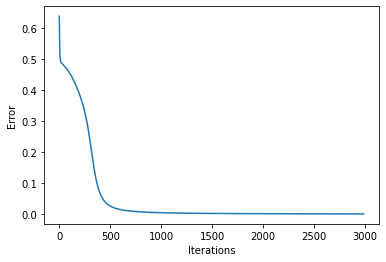

Final error 0.0009999822231108605
Reached in 2990  iterations


In [6]:
plt.plot(range(len(mse)), mse)

plt.xlabel("Iterations")
plt.ylabel("Error")

# Showing the plot.
plt.show()

print('Final error', mse[-1])
print('Reached in', len(mse),' iterations')

# 2.  Advanced Libraries (tensorflow):

In [7]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

2021-10-15 22:09:23.083641: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-15 22:09:23.083670: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


We want to implement a neural network to solve a particular classification problem using high level libraries (Tensorflow, keras). Please refer to any tutorial about Keras (on the web) to explain the chunks of code below, every time you are asked to leave an explanation. 

For this problem let's load the database Fashion (with 10 different classes) already incorporated in Keras:


In [8]:
#load the database from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's check the size of our data: 

In [9]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


We have 600000 28x28 images to learn and 100000 images to test after training. Let's have a look at some of the images:

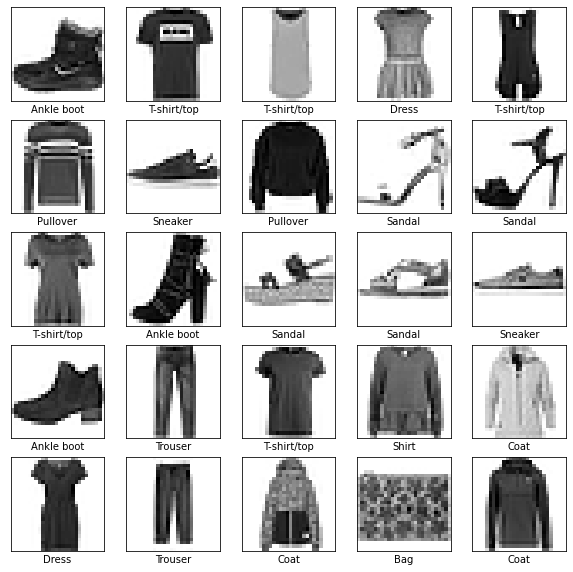

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Please explain this code:

This simply outputs the images that we want to train.  There are 10 different classes and these are the first 25 images in the "train images" set.  We are training 60000 images that are low quality (28px by 28px).

In [11]:
tr_labels=np.zeros((60000,10))
t_labels=np.zeros((10000,10))
for i in range(tr_labels.shape[0]):
    tr_labels[i,train_labels[i]]=1
    
for i in range(t_labels.shape[0]):
    t_labels[i,test_labels[i]]=1

Your explanation here:

We are initializing the trained labels (tr_labels) to be the target labels that match the training images. These are our "correct" answers.  And then we are initializing the test labels to the correct answer for the test images.  These will be used to calculate the accuracy of the system. 

So the tr_labels are the correct answers to the training images.
And the t_labels are the correct answers to the test images (which will be used to calculate accuracy)

### Now let's create a model in keras:

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

2021-10-15 22:09:40.051484: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-15 22:09:40.051520: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-15 22:09:40.051544: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (d05b4e05a114): /proc/driver/nvidia/version does not exist


Your explanation of the avobe code here.

This creates a neural network model.  The model has three layers.  One is the input (which is a "flattened shape" that is 28x28 (784 inputs).  This appears to contain the input (which is the 28x28 pictures).  The next layer brings it down to 128 neurons.  The last layer is then 10 neurons.  

The flatten function "flattens a function into a "1d" matrix.  The dense function is "Just your regular densely-connected NN layer."

### Let's complile our model:

In [13]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='mean_squared_error',
              metrics=['accuracy'])

Your explanation of the avobe code here.  

Compile, compiles the model.  The optimizer uses the Adam algorithm. The Adam algorithm is " a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments".  

Loss defines that the mean squared error function will be used to calculate the error in the learning process. 

metrics is defined as accuracy which is used to evaluate the performance of the model. 

### Let's train our model:


In [14]:
model.fit(train_images, tr_labels, epochs=5)

2021-10-15 22:09:45.159681: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2021-10-15 22:09:47.559990: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 5s 1ms/step - loss: 0.0260 - accuracy: 0.8217
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0201 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0184 - accuracy: 0.8743
Epoch 4/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.0172 - accuracy: 0.8816
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0163 - accuracy: 0.8883


Your explanation of the avobe code here

This is where we train the model.  "train_images" is the set of 60000 images that are used as imputs to train the system.  tr_lables are the target answers that are ties to the train_images. We will be traiining this by 5 epochs. As you can see, the accuracy gets better with every epoch so  it is a good idea to train it with more epochs, but there comes a time where you get diminishing returns.  The last two epochs have roughly the same accuracy. 

With my current training results, I get the following:

Epoch  | Accuracy
------ | ------
1      | 0.8182  
2      | 0.8626  
3      | 0.8753  
4      | 0.8838  
5      | 0.8892  



### Let's test our model:

In [15]:
test_loss, test_acc = model.evaluate(test_images, t_labels)
print('Test accuracy:', test_acc)

 72/313 [=====>........................] - ETA: 0s - loss: 0.0174 - accuracy: 0.8828 

2021-10-15 22:10:03.626044: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 735us/step - loss: 0.0193 - accuracy: 0.8677
Test accuracy: 0.8676999807357788


Your explanation of the above code here.  

Now we are testing our model.  We are evaluating it based on the test images supplied as well as the test labels (to evaluate if we got it right or wrong).

After this is executed, the test loss and the test accuracy is outputted.  

The test accuracy in this current run is: 0.8684999942779541

### Let's make predictions with our model:

In [16]:
predictions = model.predict(test_images)

2021-10-15 22:10:06.950860: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 31360000 exceeds 10% of free system memory.


Ready! This is how to train a Neural Network, using TensorFlow and Keras. Now let's see graphically the results of our predictions. So, the following code has nothing to do with Neural Network just with plotting the results. Do not worry about it!

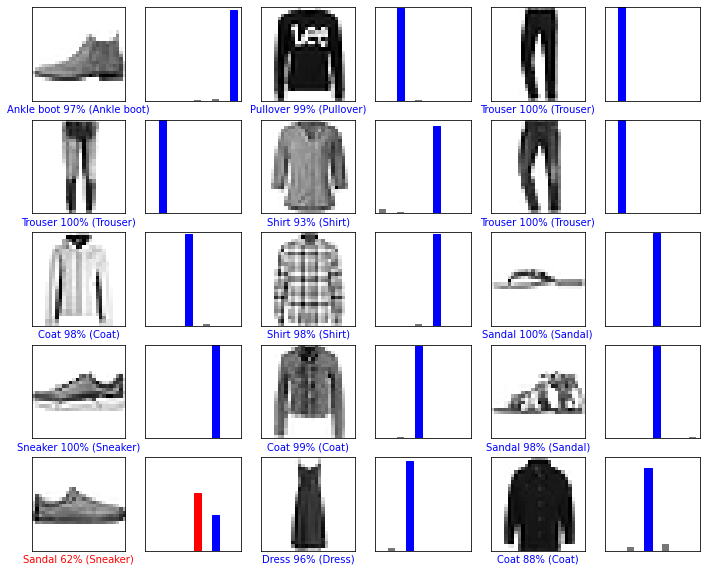

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    
    
    
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Your explanation (interpretation) of the above results here!

Now we are outputting the results for the first 15 test images, with a bar graph of the classification outputs right next to it.  In the current run, the first 15 test images were all correct.

As you can see with most of the results, most of the images were heavily favoring the correct label.  The bottom left picture is not as accurate, 65% accuracy in this current result. 

_I just ran it again and the bottom left picture was 98% classified as a sandal (not a sneaker)!_ 

In one of my earlier runs, I actually had the bottom left picture (of the sneaker) be classified as a sandal. It is interesting how the results may change with different models created.  I am assuming that is due to the initialization of random weights. 